In [1]:
from PIL import Image
import numpy as np

In [2]:
pil_img = Image.open("cat.jpg")
pil_img.load()
img = np.asarray(pil_img, dtype="float32")

In [3]:
# map from 255 to 1
img /= 255
red = img[:, :, 0]

In [4]:
import matplotlib.pyplot as plt

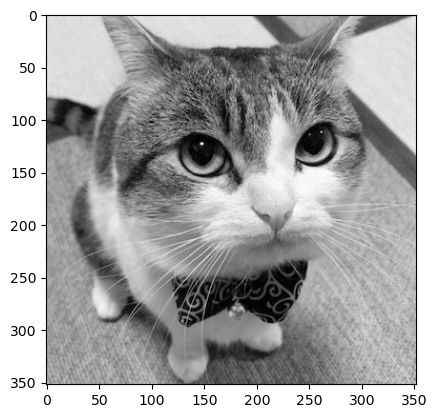

In [5]:
plt.imshow(red, cmap='gray')

In [6]:
U, S, Vt = np.linalg.svd(red)

In [7]:
def compress(n: int):
    return np.matrix(U[:, :n]) * np.diag(S[:n]) * np.matrix(Vt[:n, :])

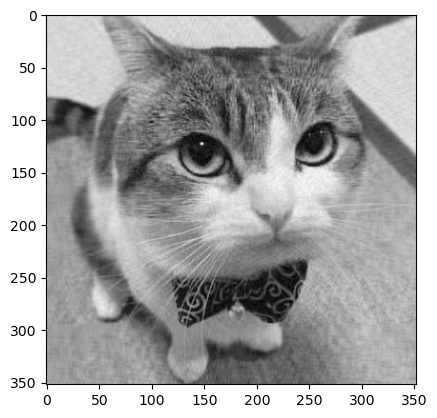

In [8]:
result = compress(60)
plt.imshow(result, cmap='gray')

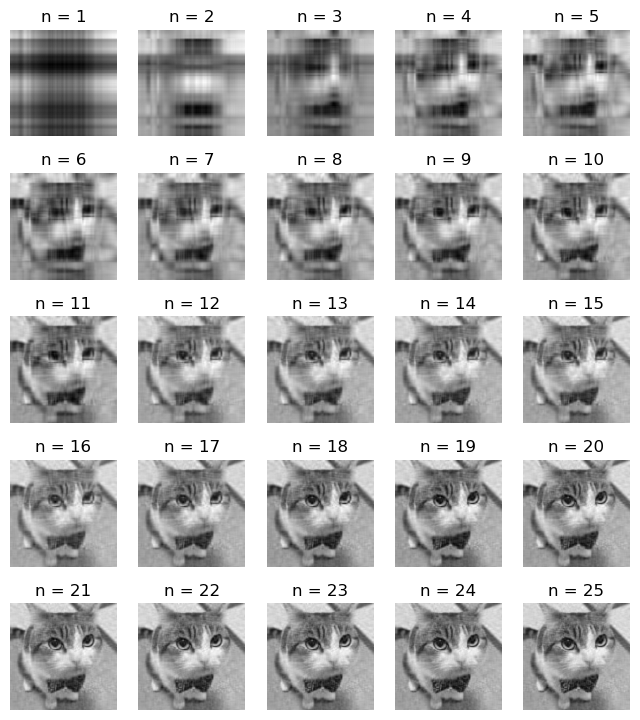

In [39]:
x = 5
y = 5
fig = plt.figure(figsize=(8, 9))

for i in range(y):
    for j in range(x):
        ax = fig.add_subplot(x, y, i * x + j + 1)
        ax.title.set_text(f"n = {i * x + j + 1}")
        ax.axis('off')
        ax.imshow(compress(i * x + j + 1), cmap='gray')
plt.show()